# Transformasi Geometri



Program ini menerapkan tiga jenis transformasi geometri pada citra:

*   Translasi: Menggeser citra sejauh tx piksel ke kanan dan ty piksel ke bawah.

*   Rotasi: Memutar citra sebesar 45 derajat berlawanan arah jarum jam dengan pusat rotasi di tengah citra.

*  Refleksi: Mencerminkan citra secara horizontal (terhadap sumbu y).










In [1]:
# Impor library yang diperlukan
import cv2                               # Library OpenCV untuk pengolahan citra digital
import numpy as np                       # Library NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Library Matplotlib untuk visualisasi gambar
from google.colab import files           # Modul untuk mengunggah file di Google Colab

In [2]:
# Mengunggah gambar dari lokal
print("Unggah gambar yang ingin diproses (format .jpg, .png, dll.)")  # Menampilkan pesan untuk meminta pengguna mengunggah gambar
uploaded = files.upload()                # Mengunggah gambar dan menyimpannya dalam variabel uploaded (berupa dictionary)

Unggah gambar yang ingin diproses (format .jpg, .png, dll.)


Saving lena 2.0.jpg to lena 2.0.jpg


In [3]:
# Memuat gambar yang diunggah
filename = next(iter(uploaded))          # Mengambil nama file pertama dari dictionary uploaded
image = cv2.imread(filename)             # Memuat gambar dalam format BGR (default OpenCV)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Mengonversi gambar dari BGR ke RGB untuk tampilan yang benar di Matplotlib

In [4]:
# Mendapatkan ukuran gambar
height, width = image.shape[:2]          # Mengambil tinggi dan lebar gambar

In [5]:
# 1. Translasi (Pergeseran)
tx, ty = 100, 50                         # Definisi pergeseran: 100 piksel ke kanan, 50 piksel ke bawah
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])  # Membuat matriks translasi
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))  # Menerapkan translasi pada gambar

In [6]:
# 2. Rotasi
angle = 45                               # Sudut rotasi: 45 derajat
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)  # Membuat matriks rotasi dengan pusat di tengah gambar
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (width, height))  # Menerapkan rotasi pada gambar

In [7]:
# 3. Refleksi (Pencerminan Horizontal)
reflection_matrix = np.float32([[-1, 0, width], [0, 1, 0]])  # Matriks untuk refleksi horizontal (mencerminkan terhadap sumbu y)
reflected_image = cv2.warpAffine(image_rgb, reflection_matrix, (width, height))  # Menerapkan refleksi pada gambar

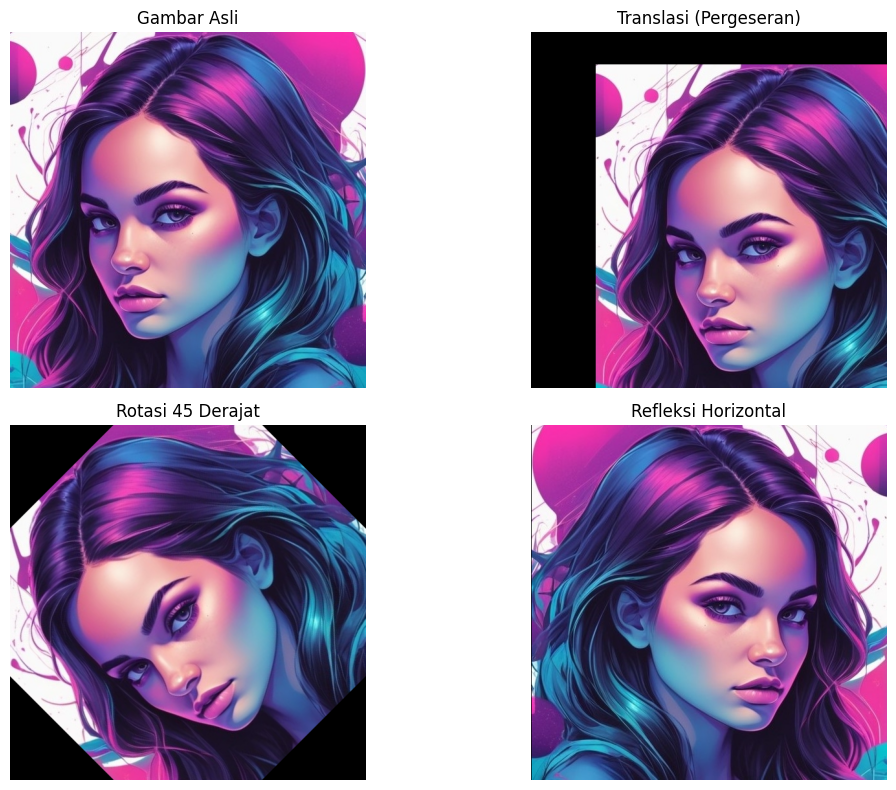

In [8]:
# Menampilkan hasil dalam satu frame
plt.figure(figsize=(12, 8))              # Membuat figure dengan ukuran 12x8 inci untuk menampung empat subplot

# Gambar Asli
plt.subplot(2, 2, 1)                     # Membuat subplot pada posisi 1 (baris 2, kolom 2, indeks 1)
plt.imshow(image_rgb)                    # Menampilkan gambar asli dalam format RGB
plt.title('Gambar Asli')                 # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu untuk tampilan yang lebih bersih

# Hasil Translasi
plt.subplot(2, 2, 2)                     # Membuat subplot pada posisi 2
plt.imshow(translated_image)             # Menampilkan gambar yang telah ditranslasi
plt.title('Translasi (Pergeseran)')      # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil Rotasi
plt.subplot(2, 2, 3)                     # Membuat subplot pada posisi 3
plt.imshow(rotated_image)                # Menampilkan gambar yang telah dirotasi
plt.title('Rotasi 45 Derajat')           # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil Refleksi
plt.subplot(2, 2, 4)                     # Membuat subplot pada posisi 4
plt.imshow(reflected_image)              # Menampilkan gambar yang telah direfleksikan
plt.title('Refleksi Horizontal')         # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

plt.tight_layout()                       # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show()                               # Menampilkan semua subplot dalam satu frame